# Artifical Neural Network - Activation Function Comparisons

This notebook will, for each activation function ReLu ad Sigmoid, create 50 neural networks and create a histogram of the most missclassified digits across all networks. 

## ReLU

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import time
from datetime import timedelta
start_time = time.monotonic()

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Reshape the data to be in the format (num_samples, 28*28) 
# pictures of numbers are 28x28 pixels
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255

# One-hot encode the target variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential() # 2 hidden layers

num_hidden = 50 # number of hidden units in single hidden layer

model.add(Dense(num_hidden, input_shape=(28 * 28,), activation='relu')) # two hidden layers added here
model.add(Dense(num_hidden, input_shape=(28 * 28,), activation='relu'))

model.add(Dense(10, activation='softmax')) # output layer - size 10 because 10 digits 0-9

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Number of sets for training
num_sets = 100

# Training the model
cycles = 50

loss = np.array([])
accuracy = np.array([])

all_incorrect_digit_counts = []


for i in range(0, cycles+1):
    print(f"--------------Trial {i+1}/{cycles}--------------")
    history = model.fit(X_train[:num_sets*1000], y_train[:num_sets*1000], epochs=30, batch_size=200, validation_split=0.2)
# epochs: number of times the entire dataset will be passed forward and backward through the neural network during training
# batch size: the number of samples that will be propagated through the network before the model's parameters are updated
# validation split: splits a fraction of the training data (20%) into a separate validation set in order 
#                                                                  to keep track of loss and accuracy

    train_loss, train_acc = model.evaluate(X_train[:num_sets*1000], y_train[:num_sets*1000])
    
    loss = np.append(loss, train_loss)
    accuracy = np.append(accuracy, train_acc)
    
        # Predict labels for the validation set
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test, axis=1)

    # Find incorrectly classified digits
    incorrect_indices = np.where(y_pred_labels != y_true_labels)[0]
    incorrect_digits = y_true_labels[incorrect_indices]

    # Count the frequency of incorrectly classified digits
    incorrect_digit_counts = np.bincount(incorrect_digits)
    
    counts = incorrect_digit_counts
    all_incorrect_digit_counts.append(counts)
    print("-------------------------------------------------")
    
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))   

--------------Trial 1/50--------------
Epoch 1/30


C:\Users\ndepe\Downloads\Anaconda\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6624 - loss: 1.0696 - val_accuracy: 0.9268 - val_loss: 0.2533
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9312 - loss: 0.2434 - val_accuracy: 0.9445 - val_loss: 0.1951
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9484 - loss: 0.1775 - val_accuracy: 0.9531 - val_loss: 0.1606
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9576 - loss: 0.1446 - val_accuracy: 0.9589 - val_loss: 0.1410
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9632 - loss: 0.1240 - val_accuracy: 0.9613 - val_loss: 0.1333
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9689 - loss: 0.1078 - val_accuracy: 0.9641 - val_loss: 0.1234
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9741 - loss: 0.0920 - val_accuracy: 0.9637 - val_loss: 0.1176
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9775 - loss: 0.0787 - val_accuracy: 0.9665 - val_

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9950 - loss: 0.0148 - val_accuracy: 0.9725 - val_loss: 0.1518
Epoch 20/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9989 - loss: 0.0045 - val_accuracy: 0.9732 - val_loss: 0.1462
Epoch 21/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9732 - val_loss: 0.1470
Epoch 22/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.9680e-04 - val_accuracy: 0.9739 - val_loss: 0.1472
Epoch 23/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.3821e-04 - val_accuracy: 0.9737 - val_loss: 0.1503
Epoch 24/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.8266e-04 - val_accuracy: 0.9743 - val_loss: 0.1510
Epoch 25/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.1349e-04 - val_accuracy: 0.9737 - val_loss: 0.1523
Epoch 26/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.0425e-04 - 

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.7340e-04 - val_accuracy: 0.9730 - val_loss: 0.1853
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.6882e-04 - val_accuracy: 0.9729 - val_loss: 0.1867
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.3532e-04 - val_accuracy: 0.9731 - val_loss: 0.1867
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.3378e-04 - val_accuracy: 0.9732 - val_loss: 0.1877
Epoch 9/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.1949e-04 - val_accuracy: 0.9732 - val_loss: 0.1887
Epoch 10/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.1189e-04 - val_accuracy: 0.9735 - val_loss: 0.1886
Epoch 11/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.0758e-04 - val_accuracy: 0.9734 - val_loss: 0.1900
Epoch 12/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.049

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 3.4918e-05 - val_accuracy: 0.9738 - val_loss: 0.2139
Epoch 23/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 3.1590e-05 - val_accuracy: 0.9739 - val_loss: 0.2150
Epoch 24/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.9756e-05 - val_accuracy: 0.9739 - val_loss: 0.2150
Epoch 25/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.9180e-05 - val_accuracy: 0.9742 - val_loss: 0.2160
Epoch 26/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.5641e-05 - val_accuracy: 0.9739 - val_loss: 0.2171
Epoch 27/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.5126e-05 - val_accuracy: 0.9741 - val_loss: 0.2171
Epoch 28/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.3605e-05 - val_accuracy: 0.9744 - val_loss: 0.2184
Epoch 29/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2

Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.4474e-05 - val_accuracy: 0.9733 - val_loss: 0.2396
Epoch 9/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.4620e-05 - val_accuracy: 0.9735 - val_loss: 0.2399
Epoch 10/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.2150e-05 - val_accuracy: 0.9737 - val_loss: 0.2408
Epoch 11/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.1801e-05 - val_accuracy: 0.9735 - val_loss: 0.2409
Epoch 12/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.0318e-05 - val_accuracy: 0.9734 - val_loss: 0.2413
Epoch 13/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.0119e-05 - val_accuracy: 0.9735 - val_loss: 0.2418
Epoch 14/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 9.5325e-06 - val_accuracy: 0.9735 - val_loss: 0.2425
Epoch 15/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.2783e-05 - val_accuracy: 0.9737 - val_loss: 0.2590
Epoch 26/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.1943e-05 - val_accuracy: 0.9739 - val_loss: 0.2594
Epoch 27/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.1524e-05 - val_accuracy: 0.9737 - val_loss: 0.2596
Epoch 28/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.0858e-05 - val_accuracy: 0.9737 - val_loss: 0.2593
Epoch 29/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 9.9121e-06 - val_accuracy: 0.9739 - val_loss: 0.2594
Epoch 30/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.0035e-06 - val_accuracy: 0.9737 - val_loss: 0.2601
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.9994 - loss: 0.0059
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step
-------------------------------------------------
--------------Trial 9/50--------------
Epo

Epoch 11/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.6425e-07 - val_accuracy: 0.9744 - val_loss: 0.2908
Epoch 12/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.3425e-07 - val_accuracy: 0.9743 - val_loss: 0.2913
Epoch 13/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.0975e-07 - val_accuracy: 0.9743 - val_loss: 0.2943
Epoch 14/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.9277e-07 - val_accuracy: 0.9739 - val_loss: 0.2956
Epoch 15/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0029 - val_accuracy: 0.9643 - val_loss: 0.4425
Epoch 16/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9915 - loss: 0.0402 - val_accuracy: 0.9703 - val_loss: 0.3194
Epoch 17/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9986 - loss: 0.0040 - val_accuracy: 0.9703 - val_loss: 0.3308
Epoch 18/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 0

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.1189e-06 - val_accuracy: 0.9730 - val_loss: 0.3042
Epoch 29/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 9.9215e-07 - val_accuracy: 0.9729 - val_loss: 0.3045
Epoch 30/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 8.9171e-07 - val_accuracy: 0.9728 - val_loss: 0.3047
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.9994 - loss: 0.0070
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step
-------------------------------------------------
--------------Trial 12/50--------------
Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.7244e-07 - val_accuracy: 0.9730 - val_loss: 0.3052
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.3417e-07 - val_accuracy: 0.9730 - val_loss: 0.3056
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.2346e-07 - val_accuracy: 0.9730 - val_loss: 0.3065
Epoch

Epoch 14/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.7713e-06 - val_accuracy: 0.9732 - val_loss: 0.3170
Epoch 15/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.5458e-06 - val_accuracy: 0.9732 - val_loss: 0.3170
Epoch 16/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.2972e-06 - val_accuracy: 0.9731 - val_loss: 0.3168
Epoch 17/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9083e-06 - val_accuracy: 0.9732 - val_loss: 0.3168
Epoch 18/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 3.3630e-06 - val_accuracy: 0.9732 - val_loss: 0.3167
Epoch 19/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.2479e-06 - val_accuracy: 0.9731 - val_loss: 0.3165
Epoch 20/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.9815e-06 - val_accuracy: 0.9732 - val_loss: 0.3165
Epoch 21/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.00

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9994 - loss: 0.0078
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
-------------------------------------------------
--------------Trial 15/50--------------
Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.4944e-07 - val_accuracy: 0.9732 - val_loss: 0.3318
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.4194e-07 - val_accuracy: 0.9735 - val_loss: 0.3337
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.2349e-07 - val_accuracy: 0.9736 - val_loss: 0.3343
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.0875e-07 - val_accuracy: 0.9735 - val_loss: 0.3353
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.0482e-07 - val_accuracy: 0.9735 - val_loss: 0.3359
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.6301e-08 - val_accuracy: 0.9737 - val_loss: 0.3362


Epoch 17/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.9827e-09 - val_accuracy: 0.9740 - val_loss: 0.3766
Epoch 18/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.9517e-09 - val_accuracy: 0.9738 - val_loss: 0.3773
Epoch 19/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.6405e-09 - val_accuracy: 0.9741 - val_loss: 0.3773
Epoch 20/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.5410e-09 - val_accuracy: 0.9740 - val_loss: 0.3783
Epoch 21/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.2666e-09 - val_accuracy: 0.9741 - val_loss: 0.3787
Epoch 22/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.1499e-09 - val_accuracy: 0.9738 - val_loss: 0.3794
Epoch 23/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9445e-09 - val_accuracy: 0.9740 - val_loss: 0.3803
Epoch 24/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.00

Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.8940e-09 - val_accuracy: 0.9743 - val_loss: 0.3929
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.8503e-09 - val_accuracy: 0.9741 - val_loss: 0.3936
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.9638e-09 - val_accuracy: 0.9743 - val_loss: 0.3936
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.7744e-09 - val_accuracy: 0.9743 - val_loss: 0.3939
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.7726e-09 - val_accuracy: 0.9744 - val_loss: 0.3938
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.9607e-09 - val_accuracy: 0.9743 - val_loss: 0.3946
Epoch 9/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.8804e-09 - val_accuracy: 0.9743 - val_loss: 0.3944
Epoch 10/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - lo

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.9613e-09 - val_accuracy: 0.9743 - val_loss: 0.4074
Epoch 21/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.7847e-09 - val_accuracy: 0.9743 - val_loss: 0.4081
Epoch 22/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.7366e-09 - val_accuracy: 0.9742 - val_loss: 0.4080
Epoch 23/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.7754e-09 - val_accuracy: 0.9743 - val_loss: 0.4084
Epoch 24/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.6809e-09 - val_accuracy: 0.9743 - val_loss: 0.4093
Epoch 25/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.8473e-09 - val_accuracy: 0.9742 - val_loss: 0.4092
Epoch 26/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.9015e-09 - val_accuracy: 0.9743 - val_loss: 0.4101
Epoch 27/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1

Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.0773e-09 - val_accuracy: 0.9737 - val_loss: 0.4271
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.0897e-09 - val_accuracy: 0.9737 - val_loss: 0.4272
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.1343e-09 - val_accuracy: 0.9738 - val_loss: 0.4286
Epoch 9/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.1006e-09 - val_accuracy: 0.9735 - val_loss: 0.4292
Epoch 10/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.1305e-09 - val_accuracy: 0.9735 - val_loss: 0.4295
Epoch 11/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.9442e-09 - val_accuracy: 0.9736 - val_loss: 0.4304
Epoch 12/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.2874e-09 - val_accuracy: 0.9735 - val_loss: 0.4311
Epoch 13/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 -

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.5699e-06 - val_accuracy: 0.9736 - val_loss: 0.4236
Epoch 24/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.2987e-06 - val_accuracy: 0.9736 - val_loss: 0.4235
Epoch 25/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.0713e-06 - val_accuracy: 0.9737 - val_loss: 0.4236
Epoch 26/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.1079e-06 - val_accuracy: 0.9737 - val_loss: 0.4235
Epoch 27/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.8064e-07 - val_accuracy: 0.9735 - val_loss: 0.4235
Epoch 28/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.9926e-07 - val_accuracy: 0.9735 - val_loss: 0.4235
Epoch 29/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.4561e-07 - val_accuracy: 0.9735 - val_loss: 0.4235
Epoch 30/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8

Epoch 9/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.4305e-08 - val_accuracy: 0.9735 - val_loss: 0.4289
Epoch 10/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.1649e-08 - val_accuracy: 0.9736 - val_loss: 0.4290
Epoch 11/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0552e-08 - val_accuracy: 0.9737 - val_loss: 0.4291
Epoch 12/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.2762e-08 - val_accuracy: 0.9737 - val_loss: 0.4293
Epoch 13/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.2868e-08 - val_accuracy: 0.9736 - val_loss: 0.4295
Epoch 14/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.8580e-08 - val_accuracy: 0.9737 - val_loss: 0.4298
Epoch 15/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.8756e-08 - val_accuracy: 0.9739 - val_loss: 0.4298
Epoch 16/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.000

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.9294e-09 - val_accuracy: 0.9737 - val_loss: 0.4504
Epoch 27/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.8590e-09 - val_accuracy: 0.9734 - val_loss: 0.4522
Epoch 28/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.9366e-09 - val_accuracy: 0.9733 - val_loss: 0.4520
Epoch 29/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.8461e-09 - val_accuracy: 0.9736 - val_loss: 0.4534
Epoch 30/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.6849e-09 - val_accuracy: 0.9736 - val_loss: 0.4536
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.9994 - loss: 0.0105
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step
-------------------------------------------------
--------------Trial 26/50--------------
Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.6821e-09 - val_accuracy: 0.9734 - val_loss: 0.4540
Epo

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9992 - loss: 0.0024 - val_accuracy: 0.9732 - val_loss: 0.4860
Epoch 13/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0015 - val_accuracy: 0.9733 - val_loss: 0.4622
Epoch 14/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 9.4788e-04 - val_accuracy: 0.9699 - val_loss: 0.4941
Epoch 15/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9987 - loss: 0.0051 - val_accuracy: 0.9737 - val_loss: 0.4362
Epoch 16/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9994 - loss: 0.0015 - val_accuracy: 0.9727 - val_loss: 0.4465
Epoch 17/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 4.1753e-04 - val_accuracy: 0.9729 - val_loss: 0.4560
Epoch 18/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 7.8680e-04 - val_accuracy: 0.9722 - val_loss: 0.4474
Epoch 19/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9990 - loss: 0.0047 - val_accu

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9722 - val_loss: 0.5008
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.9984 - loss: 0.0163
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
-------------------------------------------------
--------------Trial 29/50--------------
Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9986 - loss: 0.0070 - val_accuracy: 0.9720 - val_loss: 0.4594
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 0.0010 - val_accuracy: 0.9718 - val_loss: 0.4852
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9994 - loss: 0.0019 - val_accuracy: 0.9712 - val_loss: 0.5006
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9992 - loss: 0.0037 - val_accuracy: 0.9713 - val_loss: 0.4867
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9990 - loss: 0.0045 - val_accuracy: 0.9710 - val_loss: 0.5157
Epoch 6/30
240/240 ━━━━━━━━━━━━

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.4278e-07 - val_accuracy: 0.9744 - val_loss: 0.4669
Epoch 17/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.1846e-07 - val_accuracy: 0.9744 - val_loss: 0.4668
Epoch 18/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.5249e-07 - val_accuracy: 0.9744 - val_loss: 0.4666
Epoch 19/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.7781e-07 - val_accuracy: 0.9744 - val_loss: 0.4665
Epoch 20/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.6834e-07 - val_accuracy: 0.9744 - val_loss: 0.4663
Epoch 21/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.4686e-07 - val_accuracy: 0.9744 - val_loss: 0.4662
Epoch 22/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.4437e-07 - val_accuracy: 0.9745 - val_loss: 0.4661
Epoch 23/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1

Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.5156e-09 - val_accuracy: 0.9752 - val_loss: 0.4646
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.4908e-09 - val_accuracy: 0.9751 - val_loss: 0.4650
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.1383e-09 - val_accuracy: 0.9753 - val_loss: 0.4653
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.8929e-09 - val_accuracy: 0.9753 - val_loss: 0.4654
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.5224e-09 - val_accuracy: 0.9753 - val_loss: 0.4660
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.6476e-09 - val_accuracy: 0.9755 - val_loss: 0.4663
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.8348e-09 - val_accuracy: 0.9755 - val_loss: 0.4667
Epoch 9/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - los

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.7952e-10 - val_accuracy: 0.9750 - val_loss: 0.4929
Epoch 20/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.0234e-10 - val_accuracy: 0.9748 - val_loss: 0.4938
Epoch 21/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.2975e-10 - val_accuracy: 0.9747 - val_loss: 0.4941
Epoch 22/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.8716e-10 - val_accuracy: 0.9752 - val_loss: 0.4948
Epoch 23/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.6205e-10 - val_accuracy: 0.9748 - val_loss: 0.4955
Epoch 24/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.2532e-10 - val_accuracy: 0.9750 - val_loss: 0.4962
Epoch 25/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.2506e-10 - val_accuracy: 0.9747 - val_loss: 0.4965
Epoch 26/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6

Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.5293e-10 - val_accuracy: 0.9747 - val_loss: 0.5204
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.4703e-10 - val_accuracy: 0.9741 - val_loss: 0.5219
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.2015e-10 - val_accuracy: 0.9744 - val_loss: 0.5220
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.1043e-10 - val_accuracy: 0.9746 - val_loss: 0.5229
Epoch 9/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.6531e-10 - val_accuracy: 0.9741 - val_loss: 0.5235
Epoch 10/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.4281e-10 - val_accuracy: 0.9744 - val_loss: 0.5229
Epoch 11/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.0080e-10 - val_accuracy: 0.9740 - val_loss: 0.5247
Epoch 12/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - 

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.6180e-07 - val_accuracy: 0.9750 - val_loss: 0.4908
Epoch 23/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.3688e-07 - val_accuracy: 0.9750 - val_loss: 0.4907
Epoch 24/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.9146e-07 - val_accuracy: 0.9751 - val_loss: 0.4906
Epoch 25/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.9744e-07 - val_accuracy: 0.9752 - val_loss: 0.4905
Epoch 26/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.8805e-07 - val_accuracy: 0.9752 - val_loss: 0.4904
Epoch 27/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.5698e-07 - val_accuracy: 0.9753 - val_loss: 0.4903
Epoch 28/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.4677e-07 - val_accuracy: 0.9753 - val_loss: 0.4902
Epoch 29/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1

Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.3705e-09 - val_accuracy: 0.9750 - val_loss: 0.4870
Epoch 9/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.8430e-09 - val_accuracy: 0.9748 - val_loss: 0.4870
Epoch 10/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.0407e-09 - val_accuracy: 0.9747 - val_loss: 0.4870
Epoch 11/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.6304e-09 - val_accuracy: 0.9747 - val_loss: 0.4869
Epoch 12/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.0595e-09 - val_accuracy: 0.9746 - val_loss: 0.4871
Epoch 13/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.1082e-09 - val_accuracy: 0.9747 - val_loss: 0.4872
Epoch 14/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.5276e-09 - val_accuracy: 0.9746 - val_loss: 0.4873
Epoch 15/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.2259e-10 - val_accuracy: 0.9747 - val_loss: 0.5116
Epoch 26/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.8298e-10 - val_accuracy: 0.9747 - val_loss: 0.5115
Epoch 27/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.3838e-10 - val_accuracy: 0.9749 - val_loss: 0.5121
Epoch 28/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.7321e-10 - val_accuracy: 0.9747 - val_loss: 0.5140
Epoch 29/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.5144e-10 - val_accuracy: 0.9747 - val_loss: 0.5135
Epoch 30/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.4016e-10 - val_accuracy: 0.9747 - val_loss: 0.5164
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.9994 - loss: 0.0117
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
-------------------------------------------------
--------------Trial 40/50--------------
Ep

Epoch 11/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9991 - loss: 0.0030 - val_accuracy: 0.9708 - val_loss: 0.5804
Epoch 12/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 8.0092e-04 - val_accuracy: 0.9730 - val_loss: 0.5377
Epoch 13/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.3155e-04 - val_accuracy: 0.9749 - val_loss: 0.5122
Epoch 14/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.6086e-06 - val_accuracy: 0.9753 - val_loss: 0.5075
Epoch 15/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.9558e-06 - val_accuracy: 0.9752 - val_loss: 0.5071
Epoch 16/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.5835e-06 - val_accuracy: 0.9752 - val_loss: 0.5072
Epoch 17/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.5613e-07 - val_accuracy: 0.9753 - val_loss: 0.5071
Epoch 18/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 -

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.5272e-08 - val_accuracy: 0.9753 - val_loss: 0.5036
Epoch 29/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.5017e-08 - val_accuracy: 0.9755 - val_loss: 0.5035
Epoch 30/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.4777e-08 - val_accuracy: 0.9755 - val_loss: 0.5033
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.9994 - loss: 0.0114
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step
-------------------------------------------------
--------------Trial 43/50--------------
Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.1994e-08 - val_accuracy: 0.9754 - val_loss: 0.5032
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.9242e-08 - val_accuracy: 0.9754 - val_loss: 0.5032
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.0373e-08 - val_accuracy: 0.9754 - val_loss: 0.5031
Epoch

Epoch 14/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.8755e-10 - val_accuracy: 0.9758 - val_loss: 0.5105
Epoch 15/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.8423e-10 - val_accuracy: 0.9757 - val_loss: 0.5106
Epoch 16/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.8120e-10 - val_accuracy: 0.9758 - val_loss: 0.5116
Epoch 17/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.9671e-10 - val_accuracy: 0.9757 - val_loss: 0.5120
Epoch 18/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.7124e-10 - val_accuracy: 0.9758 - val_loss: 0.5132
Epoch 19/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.4888e-10 - val_accuracy: 0.9757 - val_loss: 0.5138
Epoch 20/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.2164e-10 - val_accuracy: 0.9756 - val_loss: 0.5146
Epoch 21/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.00

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.9994 - loss: 0.0123
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
-------------------------------------------------
--------------Trial 46/50--------------
Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.8508e-07 - val_accuracy: 0.9738 - val_loss: 0.5395
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.9114e-07 - val_accuracy: 0.9738 - val_loss: 0.5392
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.5602e-07 - val_accuracy: 0.9740 - val_loss: 0.5389
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.3548e-07 - val_accuracy: 0.9740 - val_loss: 0.5387
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.5626e-07 - val_accuracy: 0.9739 - val_loss: 0.5384
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.3383e-07 - val_accuracy: 0.9739 - val_loss: 0.5

Epoch 17/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.2672e-09 - val_accuracy: 0.9742 - val_loss: 0.5297
Epoch 18/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.4828e-09 - val_accuracy: 0.9742 - val_loss: 0.5295
Epoch 19/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.2124e-09 - val_accuracy: 0.9741 - val_loss: 0.5295
Epoch 20/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.0497e-09 - val_accuracy: 0.9743 - val_loss: 0.5292
Epoch 21/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.3937e-09 - val_accuracy: 0.9743 - val_loss: 0.5292
Epoch 22/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.0953e-09 - val_accuracy: 0.9744 - val_loss: 0.5291
Epoch 23/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.7300e-09 - val_accuracy: 0.9744 - val_loss: 0.5291
Epoch 24/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.00

Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.5617e-10 - val_accuracy: 0.9748 - val_loss: 0.5443
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.4532e-10 - val_accuracy: 0.9749 - val_loss: 0.5444
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.0881e-10 - val_accuracy: 0.9749 - val_loss: 0.5444
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.2931e-10 - val_accuracy: 0.9750 - val_loss: 0.5461
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.7955e-10 - val_accuracy: 0.9751 - val_loss: 0.5472
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.0095e-10 - val_accuracy: 0.9751 - val_loss: 0.5476
Epoch 9/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.7737e-10 - val_accuracy: 0.9748 - val_loss: 0.5471
Epoch 10/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - lo

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.3350e-07 - val_accuracy: 0.9747 - val_loss: 0.5435
Epoch 21/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.4281e-07 - val_accuracy: 0.9749 - val_loss: 0.5432
Epoch 22/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.0879e-07 - val_accuracy: 0.9748 - val_loss: 0.5430
Epoch 23/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 5.6824e-07 - val_accuracy: 0.9750 - val_loss: 0.5427
Epoch 24/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.8214e-07 - val_accuracy: 0.9749 - val_loss: 0.5425
Epoch 25/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.5676e-07 - val_accuracy: 0.9749 - val_loss: 0.5422
Epoch 26/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.8440e-07 - val_accuracy: 0.9748 - val_loss: 0.5420
Epoch 27/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4

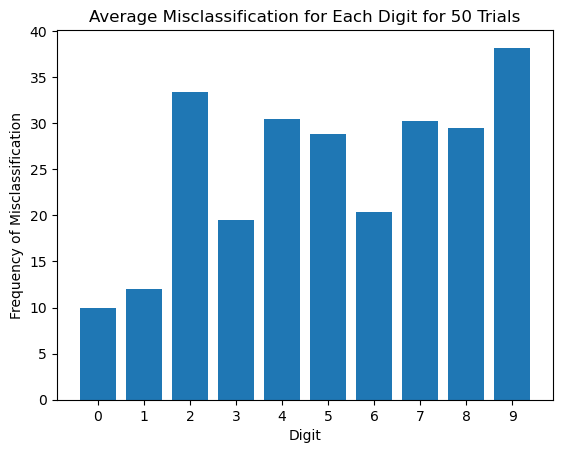

In [2]:

avg_loss = np.average(loss) # average final loss over all trials
avg_accuracy = np.average(accuracy) # avg final accuracy over all trials

incorrects_array = np.asarray(all_incorrect_digit_counts) # 

averages = np.array([])

for i in range(0, 10):
    avg = np.average(incorrects_array[0:, i])
    
    averages = np.append(averages, avg)



# Plot the histogram of incorrectly classified digits
plt.figure()
plt.bar(range(10), averages)
plt.xlabel('Digit')
plt.ylabel('Frequency of Misclassification')
plt.title(f'Average Misclassification for Each Digit for {cycles} Trials')
plt.xticks(range(10))
plt.savefig('avg_incorrect_relu.png')
plt.show()

## Sigmoid

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import time
from datetime import timedelta
start_time = time.monotonic()

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Reshape the data to be in the format (num_samples, 28*28) 
# pictures of numbers are 28x28 pixels
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255

# One-hot encode the target variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential() # 2 hidden layers

num_hidden = 50 # number of hidden neurons in single hidden layer

model.add(Dense(num_hidden, input_shape=(28 * 28,), activation='sigmoid')) # two hidden layers added here
model.add(Dense(num_hidden, input_shape=(28 * 28,), activation='sigmoid'))

model.add(Dense(10, activation='softmax')) # output layer - size 10 because 10 digits 0-9

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Number of sets for training
num_sets = 100

# Training the model
cycles = 50

loss = np.array([])
accuracy = np.array([])

all_incorrect_digit_counts = []


for i in range(0, cycles+1):
    print(f"--------------Trial {i+1}/{cycles}--------------")
    history = model.fit(X_train[:num_sets*1000], y_train[:num_sets*1000], epochs=30, batch_size=200, validation_split=0.2)
# epochs: number of times the entire dataset will be passed forward and backward through the neural network during training
# batch size: the number of samples that will be propagated through the network before the model's parameters are updated
# validation split: splits a fraction of the training data (20%) into a separate validation set in order 
#                                                                  to keep track of loss and accuracy

    train_loss, train_acc = model.evaluate(X_train[:num_sets*1000], y_train[:num_sets*1000])
    
    loss = np.append(loss, train_loss)
    accuracy = np.append(accuracy, train_acc)
    
        # Predict labels for the validation set
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test, axis=1)

    # Find incorrectly classified digits
    incorrect_indices = np.where(y_pred_labels != y_true_labels)[0]
    incorrect_digits = y_true_labels[incorrect_indices]

    # Count the frequency of incorrectly classified digits
    incorrect_digit_counts = np.bincount(incorrect_digits)
    
    counts = incorrect_digit_counts
    all_incorrect_digit_counts.append(counts)
    print("-------------------------------------------------")
    
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))   

--------------Trial 1/50--------------
Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4584 - loss: 1.9371 - val_accuracy: 0.8421 - val_loss: 0.8057
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8558 - loss: 0.6843 - val_accuracy: 0.9045 - val_loss: 0.4033
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9052 - loss: 0.3853 - val_accuracy: 0.9217 - val_loss: 0.2978
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9197 - loss: 0.2960 - val_accuracy: 0.9302 - val_loss: 0.2521
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9304 - loss: 0.2495 - val_accuracy: 0.9370 - val_loss: 0.2230
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9373 - loss: 0.2182 - val_accuracy: 0.9425 - val_loss: 0.2003
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9448 - loss: 0.1961 - val_accuracy: 0.9463 - val_loss: 0.1867
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9987 - loss: 0.0118 - val_accuracy: 0.9684 - val_loss: 0.1232
Epoch 20/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9987 - loss: 0.0123 - val_accuracy: 0.9691 - val_loss: 0.1241
Epoch 21/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9987 - loss: 0.0111 - val_accuracy: 0.9686 - val_loss: 0.1260
Epoch 22/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9990 - loss: 0.0098 - val_accuracy: 0.9672 - val_loss: 0.1283
Epoch 23/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9989 - loss: 0.0104 - val_accuracy: 0.9683 - val_loss: 0.1280
Epoch 24/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9991 - loss: 0.0089 - val_accuracy: 0.9692 - val_loss: 0.1291
Epoch 25/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9993 - loss: 0.0080 - val_accuracy: 0.9696 - val_loss: 0.1300
Epoch 26/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9995 - loss: 0.0072 - val_accuracy: 0.9685

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.6502e-04 - val_accuracy: 0.9687 - val_loss: 0.1854
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.1424e-04 - val_accuracy: 0.9688 - val_loss: 0.1869
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.0905e-04 - val_accuracy: 0.9683 - val_loss: 0.1890
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.0291e-04 - val_accuracy: 0.9688 - val_loss: 0.1915
Epoch 9/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.8393e-04 - val_accuracy: 0.9687 - val_loss: 0.1918
Epoch 10/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.5381e-04 - val_accuracy: 0.9686 - val_loss: 0.1924
Epoch 11/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.3153e-04 - val_accuracy: 0.9678 - val_loss: 0.1947
Epoch 12/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.204

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.6667e-05 - val_accuracy: 0.9676 - val_loss: 0.2433
Epoch 23/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.5812e-05 - val_accuracy: 0.9672 - val_loss: 0.2445
Epoch 24/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.2638e-05 - val_accuracy: 0.9681 - val_loss: 0.2472
Epoch 25/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.1170e-05 - val_accuracy: 0.9672 - val_loss: 0.2507
Epoch 26/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.9959e-05 - val_accuracy: 0.9677 - val_loss: 0.2512
Epoch 27/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.7627e-05 - val_accuracy: 0.9687 - val_loss: 0.2509
Epoch 28/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 8.9692e-04 - val_accuracy: 0.9621 - val_loss: 0.3031
Epoch 29/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9983 - loss: 0

Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 7.5324e-06 - val_accuracy: 0.9674 - val_loss: 0.2698
Epoch 9/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 6.9286e-06 - val_accuracy: 0.9668 - val_loss: 0.2714
Epoch 10/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.4585e-06 - val_accuracy: 0.9671 - val_loss: 0.2729
Epoch 11/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 6.4388e-06 - val_accuracy: 0.9671 - val_loss: 0.2731
Epoch 12/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.8336e-06 - val_accuracy: 0.9671 - val_loss: 0.2754
Epoch 13/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.4949e-06 - val_accuracy: 0.9670 - val_loss: 0.2761
Epoch 14/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.3589e-06 - val_accuracy: 0.9672 - val_loss: 0.2775
Epoch 15/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 4.5174e-06 - val_accuracy: 0.9678 - val_loss: 0.3155
Epoch 26/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 4.0625e-06 - val_accuracy: 0.9679 - val_loss: 0.3153
Epoch 27/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9024e-06 - val_accuracy: 0.9678 - val_loss: 0.3151
Epoch 28/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.7103e-06 - val_accuracy: 0.9681 - val_loss: 0.3150
Epoch 29/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.6684e-06 - val_accuracy: 0.9680 - val_loss: 0.3150
Epoch 30/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.2861e-06 - val_accuracy: 0.9678 - val_loss: 0.3148
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.9993 - loss: 0.0072
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step
-------------------------------------------------
--------------Trial 9/50--------------
Epo

Epoch 11/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.9313e-07 - val_accuracy: 0.9672 - val_loss: 0.3338
Epoch 12/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.9201e-07 - val_accuracy: 0.9670 - val_loss: 0.3353
Epoch 13/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.6566e-07 - val_accuracy: 0.9668 - val_loss: 0.3354
Epoch 14/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.3757e-07 - val_accuracy: 0.9667 - val_loss: 0.3381
Epoch 15/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 3.3034e-07 - val_accuracy: 0.9669 - val_loss: 0.3392
Epoch 16/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.0155e-07 - val_accuracy: 0.9671 - val_loss: 0.3417
Epoch 17/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.9769e-07 - val_accuracy: 0.9670 - val_loss: 0.3413
Epoch 18/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 35769s 150s/step - accuracy:

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 6.3031e-08 - val_accuracy: 0.9673 - val_loss: 0.3697
Epoch 29/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 6.4548e-08 - val_accuracy: 0.9672 - val_loss: 0.3699
Epoch 30/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 6.2272e-08 - val_accuracy: 0.9675 - val_loss: 0.3705
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.9993 - loss: 0.0085
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step
-------------------------------------------------
--------------Trial 12/50--------------
Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.0134e-08 - val_accuracy: 0.9672 - val_loss: 0.3706
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.8755e-08 - val_accuracy: 0.9672 - val_loss: 0.3716
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.4701e-08 - val_accuracy: 0.9672 - val_loss: 0.3709
Epoch

Epoch 14/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.2806e-08 - val_accuracy: 0.9674 - val_loss: 0.3829
Epoch 15/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 3.1818e-08 - val_accuracy: 0.9672 - val_loss: 0.3832
Epoch 16/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 3.0390e-08 - val_accuracy: 0.9673 - val_loss: 0.3835
Epoch 17/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 3.1103e-08 - val_accuracy: 0.9676 - val_loss: 0.3835
Epoch 18/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.0890e-08 - val_accuracy: 0.9674 - val_loss: 0.3839
Epoch 19/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.0742e-08 - val_accuracy: 0.9674 - val_loss: 0.3839
Epoch 20/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 3.0928e-08 - val_accuracy: 0.9672 - val_loss: 0.3839
Epoch 21/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.00

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.9993 - loss: 0.0090
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
-------------------------------------------------
--------------Trial 15/50--------------
Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.1453e-08 - val_accuracy: 0.9672 - val_loss: 0.3910
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.1288e-08 - val_accuracy: 0.9672 - val_loss: 0.3911
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.0614e-08 - val_accuracy: 0.9673 - val_loss: 0.3912
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.9984e-08 - val_accuracy: 0.9676 - val_loss: 0.3913
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.0700e-08 - val_accuracy: 0.9673 - val_loss: 0.3918
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.0352e-08 - val_accuracy: 0.9672 - val_loss: 0.3

Epoch 17/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.5393e-08 - val_accuracy: 0.9674 - val_loss: 0.3963
Epoch 18/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.5411e-08 - val_accuracy: 0.9672 - val_loss: 0.3964
Epoch 19/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.5056e-08 - val_accuracy: 0.9673 - val_loss: 0.3966
Epoch 20/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.5236e-08 - val_accuracy: 0.9674 - val_loss: 0.3966
Epoch 21/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.4765e-08 - val_accuracy: 0.9673 - val_loss: 0.3966
Epoch 22/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.5292e-08 - val_accuracy: 0.9673 - val_loss: 0.3967
Epoch 23/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.4628e-08 - val_accuracy: 0.9674 - val_loss: 0.3968
Epoch 24/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.00

Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.2416e-08 - val_accuracy: 0.9672 - val_loss: 0.4003
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.2117e-08 - val_accuracy: 0.9672 - val_loss: 0.4001
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.2373e-08 - val_accuracy: 0.9672 - val_loss: 0.4005
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.1790e-08 - val_accuracy: 0.9672 - val_loss: 0.4005
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.2443e-08 - val_accuracy: 0.9672 - val_loss: 0.4005
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.2248e-08 - val_accuracy: 0.9672 - val_loss: 0.4009
Epoch 9/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.2138e-08 - val_accuracy: 0.9674 - val_loss: 0.4008
Epoch 10/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - lo

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.0065e-08 - val_accuracy: 0.9672 - val_loss: 0.4034
Epoch 21/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 9.9283e-09 - val_accuracy: 0.9668 - val_loss: 0.4036
Epoch 22/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 9.9496e-09 - val_accuracy: 0.9669 - val_loss: 0.4035
Epoch 23/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.6500e-09 - val_accuracy: 0.9672 - val_loss: 0.4035
Epoch 24/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 9.7240e-09 - val_accuracy: 0.9669 - val_loss: 0.4036
Epoch 25/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.0029e-08 - val_accuracy: 0.9668 - val_loss: 0.4038
Epoch 26/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.9747e-09 - val_accuracy: 0.9672 - val_loss: 0.4038
Epoch 27/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1

Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 8.5581e-09 - val_accuracy: 0.9668 - val_loss: 0.4059
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.5123e-09 - val_accuracy: 0.9669 - val_loss: 0.4061
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 8.5118e-09 - val_accuracy: 0.9668 - val_loss: 0.4060
Epoch 9/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.6736e-09 - val_accuracy: 0.9669 - val_loss: 0.4061
Epoch 10/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.5572e-09 - val_accuracy: 0.9670 - val_loss: 0.4062
Epoch 11/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.6251e-09 - val_accuracy: 0.9669 - val_loss: 0.4062
Epoch 12/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.2895e-09 - val_accuracy: 0.9668 - val_loss: 0.4062
Epoch 13/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 -

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.3664e-09 - val_accuracy: 0.9668 - val_loss: 0.4078
Epoch 24/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 7.4864e-09 - val_accuracy: 0.9669 - val_loss: 0.4080
Epoch 25/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 7.4003e-09 - val_accuracy: 0.9668 - val_loss: 0.4079
Epoch 26/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 7.2899e-09 - val_accuracy: 0.9670 - val_loss: 0.4081
Epoch 27/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.4515e-09 - val_accuracy: 0.9670 - val_loss: 0.4080
Epoch 28/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 7.3799e-09 - val_accuracy: 0.9669 - val_loss: 0.4081
Epoch 29/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 7.4919e-09 - val_accuracy: 0.9668 - val_loss: 0.4081
Epoch 30/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 7

Epoch 9/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.5865e-09 - val_accuracy: 0.9670 - val_loss: 0.4094
Epoch 10/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.9712e-09 - val_accuracy: 0.9668 - val_loss: 0.4095
Epoch 11/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.6310e-09 - val_accuracy: 0.9671 - val_loss: 0.4096
Epoch 12/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.8576e-09 - val_accuracy: 0.9670 - val_loss: 0.4095
Epoch 13/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 6.7931e-09 - val_accuracy: 0.9670 - val_loss: 0.4096
Epoch 14/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 6.8941e-09 - val_accuracy: 0.9669 - val_loss: 0.4095
Epoch 15/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.5267e-09 - val_accuracy: 0.9670 - val_loss: 0.4095
Epoch 16/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.000

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 5.9854e-09 - val_accuracy: 0.9671 - val_loss: 0.4108
Epoch 27/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.1338e-09 - val_accuracy: 0.9672 - val_loss: 0.4108
Epoch 28/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.1998e-09 - val_accuracy: 0.9671 - val_loss: 0.4107
Epoch 29/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.9556e-09 - val_accuracy: 0.9671 - val_loss: 0.4106
Epoch 30/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 6.2415e-09 - val_accuracy: 0.9671 - val_loss: 0.4108
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.9992 - loss: 0.0094
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
-------------------------------------------------
--------------Trial 26/50--------------
Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.2604e-09 - val_accuracy: 0.9671 - val_loss: 0.4108
Epo

Epoch 12/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.4624e-09 - val_accuracy: 0.9670 - val_loss: 0.4117
Epoch 13/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.5808e-09 - val_accuracy: 0.9671 - val_loss: 0.4117
Epoch 14/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.6085e-09 - val_accuracy: 0.9670 - val_loss: 0.4116
Epoch 15/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.6517e-09 - val_accuracy: 0.9670 - val_loss: 0.4116
Epoch 16/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.5627e-09 - val_accuracy: 0.9670 - val_loss: 0.4117
Epoch 17/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.6354e-09 - val_accuracy: 0.9671 - val_loss: 0.4117
Epoch 18/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.6306e-09 - val_accuracy: 0.9670 - val_loss: 0.4117
Epoch 19/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.00

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.3360e-09 - val_accuracy: 0.9670 - val_loss: 0.4123
Epoch 30/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.2768e-09 - val_accuracy: 0.9671 - val_loss: 0.4124
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - accuracy: 0.9992 - loss: 0.0095
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
-------------------------------------------------
--------------Trial 29/50--------------
Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.2083e-09 - val_accuracy: 0.9670 - val_loss: 0.4123
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.3084e-09 - val_accuracy: 0.9671 - val_loss: 0.4124
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.6071e-09 - val_accuracy: 0.9671 - val_loss: 0.4125
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.4522e-09 - val_accuracy: 0.9671 - val_loss: 0.4124
Epoch 5/

Epoch 15/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 4.8264e-09 - val_accuracy: 0.9671 - val_loss: 0.4129
Epoch 16/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.9926e-09 - val_accuracy: 0.9669 - val_loss: 0.4128
Epoch 17/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.4010e-09 - val_accuracy: 0.9671 - val_loss: 0.4128
Epoch 18/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.0407e-09 - val_accuracy: 0.9670 - val_loss: 0.4129
Epoch 19/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.0834e-09 - val_accuracy: 0.9672 - val_loss: 0.4128
Epoch 20/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.0619e-09 - val_accuracy: 0.9672 - val_loss: 0.4130
Epoch 21/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.9376e-09 - val_accuracy: 0.9672 - val_loss: 0.4130
Epoch 22/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.00

Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.0549e-09 - val_accuracy: 0.9669 - val_loss: 0.4133
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.8823e-09 - val_accuracy: 0.9672 - val_loss: 0.4133
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.9747e-09 - val_accuracy: 0.9672 - val_loss: 0.4133
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.7258e-09 - val_accuracy: 0.9671 - val_loss: 0.4133
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.7948e-09 - val_accuracy: 0.9672 - val_loss: 0.4133
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.0235e-09 - val_accuracy: 0.9672 - val_loss: 0.4133
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.6978e-09 - val_accuracy: 0.9669 - val_loss: 0.4134
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - los

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.7421e-09 - val_accuracy: 0.9670 - val_loss: 0.4135
Epoch 19/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.8868e-09 - val_accuracy: 0.9670 - val_loss: 0.4135
Epoch 20/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.8330e-09 - val_accuracy: 0.9671 - val_loss: 0.4137
Epoch 21/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 4.9000e-09 - val_accuracy: 0.9670 - val_loss: 0.4136
Epoch 22/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.0325e-09 - val_accuracy: 0.9670 - val_loss: 0.4136
Epoch 23/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.7002e-09 - val_accuracy: 0.9671 - val_loss: 0.4137
Epoch 24/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.6956e-09 - val_accuracy: 0.9669 - val_loss: 0.4137
Epoch 25/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 4

Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.5657e-09 - val_accuracy: 0.9671 - val_loss: 0.4138
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.6429e-09 - val_accuracy: 0.9668 - val_loss: 0.4139
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 4.6200e-09 - val_accuracy: 0.9671 - val_loss: 0.4139
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.4437e-09 - val_accuracy: 0.9670 - val_loss: 0.4139
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.4797e-09 - val_accuracy: 0.9669 - val_loss: 0.4139
Epoch 9/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.7041e-09 - val_accuracy: 0.9670 - val_loss: 0.4139
Epoch 10/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.5371e-09 - val_accuracy: 0.9669 - val_loss: 0.4139
Epoch 11/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - l

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.4156e-09 - val_accuracy: 0.9669 - val_loss: 0.4140
Epoch 22/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.4431e-09 - val_accuracy: 0.9668 - val_loss: 0.4140
Epoch 23/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.6561e-09 - val_accuracy: 0.9670 - val_loss: 0.4140
Epoch 24/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.4910e-09 - val_accuracy: 0.9668 - val_loss: 0.4141
Epoch 25/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.5152e-09 - val_accuracy: 0.9668 - val_loss: 0.4142
Epoch 26/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.2679e-09 - val_accuracy: 0.9668 - val_loss: 0.4141
Epoch 27/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.5618e-09 - val_accuracy: 0.9669 - val_loss: 0.4142
Epoch 28/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4

Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.4829e-09 - val_accuracy: 0.9669 - val_loss: 0.4143
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.4747e-09 - val_accuracy: 0.9668 - val_loss: 0.4143
Epoch 9/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.2843e-09 - val_accuracy: 0.9668 - val_loss: 0.4143
Epoch 10/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.3908e-09 - val_accuracy: 0.9669 - val_loss: 0.4143
Epoch 11/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.3523e-09 - val_accuracy: 0.9669 - val_loss: 0.4143
Epoch 12/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.2073e-09 - val_accuracy: 0.9669 - val_loss: 0.4143
Epoch 13/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.4538e-09 - val_accuracy: 0.9669 - val_loss: 0.4143
Epoch 14/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.1887e-09 - val_accuracy: 0.9668 - val_loss: 0.4145
Epoch 25/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.2857e-09 - val_accuracy: 0.9669 - val_loss: 0.4146
Epoch 26/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.2702e-09 - val_accuracy: 0.9668 - val_loss: 0.4146
Epoch 27/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0464e-09 - val_accuracy: 0.9668 - val_loss: 0.4144
Epoch 28/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.4907e-09 - val_accuracy: 0.9668 - val_loss: 0.4146
Epoch 29/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.3557e-09 - val_accuracy: 0.9668 - val_loss: 0.4146
Epoch 30/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.4442e-09 - val_accuracy: 0.9668 - val_loss: 0.4147
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - accuracy: 0.9992 - loss: 0.0095
31

Epoch 10/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.3261e-09 - val_accuracy: 0.9669 - val_loss: 0.4148
Epoch 11/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.1885e-09 - val_accuracy: 0.9668 - val_loss: 0.4148
Epoch 12/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.1135e-09 - val_accuracy: 0.9668 - val_loss: 0.4148
Epoch 13/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.5298e-09 - val_accuracy: 0.9668 - val_loss: 0.4148
Epoch 14/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.3952e-09 - val_accuracy: 0.9669 - val_loss: 0.4149
Epoch 15/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.3753e-09 - val_accuracy: 0.9669 - val_loss: 0.4149
Epoch 16/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 4.2213e-09 - val_accuracy: 0.9668 - val_loss: 0.4148
Epoch 17/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.00

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.2819e-09 - val_accuracy: 0.9668 - val_loss: 0.4149
Epoch 28/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.1587e-09 - val_accuracy: 0.9668 - val_loss: 0.4150
Epoch 29/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.3619e-09 - val_accuracy: 0.9668 - val_loss: 0.4151
Epoch 30/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0392e-09 - val_accuracy: 0.9668 - val_loss: 0.4150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.9992 - loss: 0.0095
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
-------------------------------------------------
--------------Trial 43/50--------------
Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.2912e-09 - val_accuracy: 0.9668 - val_loss: 0.4150
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.1770e-09 - val_accuracy: 0.9668 - val_loss: 0.4150
Epoc

Epoch 13/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.3544e-09 - val_accuracy: 0.9668 - val_loss: 0.4151
Epoch 14/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0489e-09 - val_accuracy: 0.9667 - val_loss: 0.4151
Epoch 15/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0868e-09 - val_accuracy: 0.9668 - val_loss: 0.4152
Epoch 16/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.1233e-09 - val_accuracy: 0.9668 - val_loss: 0.4152
Epoch 17/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.1927e-09 - val_accuracy: 0.9667 - val_loss: 0.4151
Epoch 18/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.1006e-09 - val_accuracy: 0.9668 - val_loss: 0.4151
Epoch 19/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.2286e-09 - val_accuracy: 0.9668 - val_loss: 0.4151
Epoch 20/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.00

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0826e-09 - val_accuracy: 0.9667 - val_loss: 0.4154
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 0.9992 - loss: 0.0095
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step
-------------------------------------------------
--------------Trial 46/50--------------
Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.1042e-09 - val_accuracy: 0.9668 - val_loss: 0.4153
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.8533e-09 - val_accuracy: 0.9668 - val_loss: 0.4153
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.2532e-09 - val_accuracy: 0.9668 - val_loss: 0.4154
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0911e-09 - val_accuracy: 0.9668 - val_loss: 0.4153
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 3.9791e-09 - val_accuracy: 0.9668 - val_loss: 0.4154
Epoch 6

Epoch 16/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.2784e-09 - val_accuracy: 0.9666 - val_loss: 0.4155
Epoch 17/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0984e-09 - val_accuracy: 0.9668 - val_loss: 0.4156
Epoch 18/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.2501e-09 - val_accuracy: 0.9667 - val_loss: 0.4155
Epoch 19/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9846e-09 - val_accuracy: 0.9667 - val_loss: 0.4156
Epoch 20/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.1822e-09 - val_accuracy: 0.9667 - val_loss: 0.4156
Epoch 21/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9046e-09 - val_accuracy: 0.9666 - val_loss: 0.4155
Epoch 22/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9822e-09 - val_accuracy: 0.9667 - val_loss: 0.4155
Epoch 23/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.00

Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0720e-09 - val_accuracy: 0.9666 - val_loss: 0.4157
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.8714e-09 - val_accuracy: 0.9667 - val_loss: 0.4158
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0336e-09 - val_accuracy: 0.9666 - val_loss: 0.4157
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0004e-09 - val_accuracy: 0.9667 - val_loss: 0.4158
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9146e-09 - val_accuracy: 0.9667 - val_loss: 0.4157
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0224e-09 - val_accuracy: 0.9667 - val_loss: 0.4157
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.2042e-09 - val_accuracy: 0.9667 - val_loss: 0.4158
Epoch 9/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - los

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9991e-09 - val_accuracy: 0.9663 - val_loss: 0.4159
Epoch 20/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.1008e-09 - val_accuracy: 0.9665 - val_loss: 0.4159
Epoch 21/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0486e-09 - val_accuracy: 0.9665 - val_loss: 0.4159
Epoch 22/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9948e-09 - val_accuracy: 0.9665 - val_loss: 0.4160
Epoch 23/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9740e-09 - val_accuracy: 0.9666 - val_loss: 0.4159
Epoch 24/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0854e-09 - val_accuracy: 0.9665 - val_loss: 0.4158
Epoch 25/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9797e-09 - val_accuracy: 0.9665 - val_loss: 0.4159
Epoch 26/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4

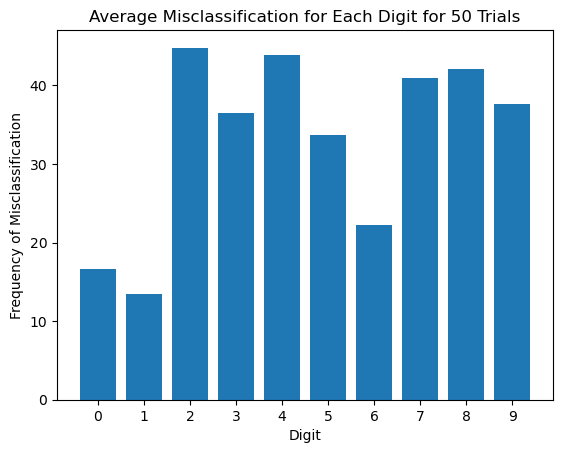

In [4]:

avg_loss = np.average(loss) # average final loss over all trials
avg_accuracy = np.average(accuracy) # avg final accuracy over all trials

incorrects_array = np.asarray(all_incorrect_digit_counts) # 

averages = np.array([])

for i in range(0, 10):
    avg = np.average(incorrects_array[0:, i])
    
    averages = np.append(averages, avg)



# Plot the histogram of incorrectly classified digits
plt.figure()
plt.bar(range(10), averages)
plt.xlabel('Digit')
plt.ylabel('Frequency of Misclassification')
plt.title(f'Average Misclassification for Each Digit for {cycles} Trials')
plt.xticks(range(10))
plt.savefig('avg_incorrect_sigmoid.png')
plt.show()